# LDA Topic Modelling

In [1]:
import pandas as pd
from sklearn.decomposition import LatentDirichletAllocation

In [2]:
TF = pd.read_csv("/content/drive/MyDrive/ppw/tugas/tugas_ppw/TF_label.csv")
TF

,aalysis,aam,abad,abadi,ability,abjad,absensi,absolut,absolute,abstract,...,zat,zcz,zf,zona,zone,zoning,zoom,zucara,zungu,Label
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,RPL
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,RPL
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,RPL
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,KK
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,KK
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
853,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,KK
854,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,KK
855,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,KK
856,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,KK


In [ ]:
lda = LatentDirichletAllocation(n_components=3, doc_topic_prior=0.2, topic_word_prior=0.1,random_state=42,max_iter=1)
x=TF.drop('Label', axis=1)
lda_top=lda.fit_transform(x)

In [ ]:
print(lda_top.shape)  # (no_of_doc,no_of_topics)
print(lda_top)

(858, 3)
[[0.00235894 0.0023668  0.99527426]
 [0.99638171 0.00181233 0.00180596]
 [0.00173515 0.0443368  0.95392806]
 ...
 [0.86155336 0.13717287 0.00127378]
 [0.95866294 0.03980294 0.00153412]
 [0.55314023 0.00224454 0.44461524]]


In [ ]:
#bobot setiap topik terhadap dokumen
U = pd.DataFrame(lda_top, columns=['Topik 1','Topik 2','Topik 3'])
U['Label']=TF['Label'].values
U

,Topik 1,Topik 2,Topik 3,Label
0,0.002359,0.002367,0.995274,RPL
1,0.996382,0.001812,0.001806,RPL
2,0.001735,0.044337,0.953928,RPL
3,0.002740,0.002761,0.994499,KK
4,0.995268,0.002382,0.002349,KK
...,...,...,...,...
853,0.001711,0.001708,0.996581,KK
854,0.002346,0.995319,0.002335,KK
855,0.861553,0.137173,0.001274,KK
856,0.958663,0.039803,0.001534,KK


In [ ]:
lda2 = LatentDirichletAllocation(n_components=4, doc_topic_prior=0.2, topic_word_prior=0.1,random_state=42,max_iter=1)
lda2_top=lda2.fit_transform(x)

In [ ]:
#bobot setiap topik terhadap dokumen
U2 = pd.DataFrame(lda2_top, columns=['Topik 1','Topik 2','Topik 3', 'Topik 4'])
U2['Label']=TF['Label'].values
U2

,Topik 1,Topik 2,Topik 3,Topik 4,Label
0,0.002351,0.002358,0.992942,0.002349,RPL
1,0.994596,0.001806,0.001801,0.001797,RPL
2,0.001729,0.001750,0.994787,0.001735,RPL
3,0.002728,0.095731,0.898794,0.002747,KK
4,0.728891,0.266431,0.002341,0.002337,KK
...,...,...,...,...,...
853,0.001708,0.001705,0.994882,0.001705,KK
854,0.002340,0.992992,0.002330,0.002338,KK
855,0.359083,0.001268,0.001268,0.638381,KK
856,0.995396,0.001536,0.001530,0.001538,KK


In [ ]:
print(lda.components_)
print(lda.components_.shape)  # (no_of_topics*no_of_words)

[[0.10006595 0.10070547 0.65112597 ... 2.10272685 0.69829432 0.6513604 ]
 [1.09987872 0.97368706 0.19025695 ... 1.08626467 0.32041452 0.39826424]
 [0.10005533 1.22560747 1.45861708 ... 0.11100847 0.28129116 0.25037536]]
(3, 8648)


In [ ]:
#bobot setiap kata terhadap topik
label=[]
for i in range (1,(lda.components_.shape[1]+1)):
  masukan = TF.columns[i-1]
  label.append(masukan)
VT_tabel = pd.DataFrame(lda.components_,columns=label)
VT_tabel.rename(index={0:"Topik 1",1:"Topik 2",2:"Topik 3"}).transpose()

,Topik 1,Topik 2,Topik 3
aalysis,0.100066,1.099879,0.100055
aam,0.100705,0.973687,1.225607
abad,0.651126,0.190257,1.458617
abadi,1.915571,0.180028,0.204401
ability,0.361758,0.838201,0.100040
...,...,...,...
zone,0.505198,0.100102,2.694700
zoning,0.692440,0.100208,3.507352
zoom,2.102727,1.086265,0.111008
zucara,0.698294,0.320415,0.281291


In [ ]:
datalda=[]
for i in range (3,51):
  lda = LatentDirichletAllocation(n_components=i, doc_topic_prior=0.2, topic_word_prior=0.1,random_state=42,max_iter=1)
  lda_top=lda.fit_transform(TF.drop(columns='Label'))
  datalda.append(lda_top)

## Naive Bayes

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
import pickle

In [ ]:
akurasi=[]
for i in range(len(datalda)):
  y = TF.Label
  X_train,X_test,y_train,y_test = train_test_split(datalda[i],y,test_size=0.2,random_state=42)
  NB = GaussianNB()
  gaus=NB.fit(X_train, y_train)
  nlakurasi=gaus.score(X_test, y_test)
  akurasi.append(nlakurasi)

In [ ]:
for i in range(len(akurasi)):
  print ("topik", i+3, ":", akurasi[i])

topik 3 : 0.6104651162790697
topik 4 : 0.6511627906976745
topik 5 : 0.5813953488372093
topik 6 : 0.5872093023255814
topik 7 : 0.563953488372093
topik 8 : 0.5697674418604651
topik 9 : 0.5813953488372093
topik 10 : 0.5523255813953488
topik 11 : 0.563953488372093
topik 12 : 0.5872093023255814
topik 13 : 0.5290697674418605
topik 14 : 0.5930232558139535
topik 15 : 0.5988372093023255
topik 16 : 0.5581395348837209
topik 17 : 0.5348837209302325
topik 18 : 0.5697674418604651
topik 19 : 0.5755813953488372
topik 20 : 0.6162790697674418
topik 21 : 0.627906976744186
topik 22 : 0.6104651162790697
topik 23 : 0.6453488372093024
topik 24 : 0.5813953488372093
topik 25 : 0.6046511627906976
topik 26 : 0.6395348837209303
topik 27 : 0.5523255813953488
topik 28 : 0.6569767441860465
topik 29 : 0.6162790697674418
topik 30 : 0.5930232558139535
topik 31 : 0.5348837209302325
topik 32 : 0.563953488372093
topik 33 : 0.5988372093023255
topik 34 : 0.5988372093023255
topik 35 : 0.6453488372093024
topik 36 : 0.58139534

In [9]:
lda1 = LatentDirichletAllocation(n_components=4, doc_topic_prior=0.2, topic_word_prior=0.1,random_state=42,max_iter=1)
lda_top1=lda1.fit_transform(TF.drop(columns='Label'))
y = TF.Label
X_train,X_test,y_train,y_test = train_test_split(lda_top1,y,test_size=0.2,random_state=42)
NB = GaussianNB()
gaus=NB.fit(X_train, y_train)
gaus.score(X_test, y_test)

0.6511627906976745

In [10]:
pickle.dump(lda1,open('/content/drive/MyDrive/ppw/tugas/tugas_ppw/lda_nb.sav','wb'))
pickle.dump(NB,open('/content/drive/MyDrive/ppw/tugas/tugas_ppw/nb.sav','wb'))

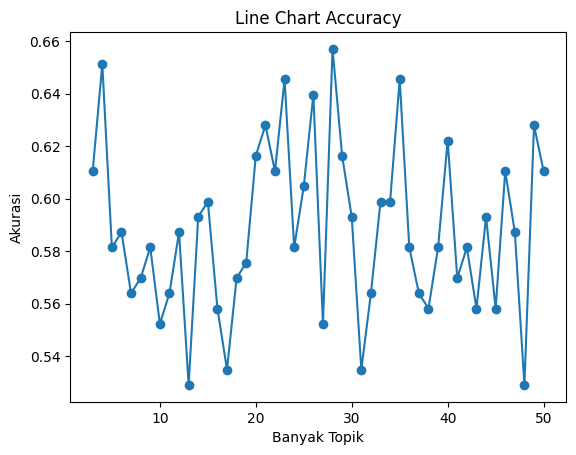

In [ ]:
import matplotlib.pyplot as plt

# Data
x = []
for i in range(3,51):
  x.append(i)
y = akurasi

# Create a line chart
plt.plot(x, y, marker='o', linestyle='-')  # 'o' for markers, '-' for solid line

# Add a title and axis labels
plt.title('Line Chart Accuracy')
plt.xlabel('Banyak Topik')
plt.ylabel('Akurasi')

# Show the plot
plt.show()


## KNN

In [4]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
akurasi2=[]
for i in range(len(datalda)):
  y = TF.Label
  X_train,X_test,y_train,y_test = train_test_split(datalda[i],y,test_size=0.2,random_state=42)
  model2 = KNeighborsClassifier(n_neighbors=3)
  knn=model2.fit(X_train, y_train)
  nlakurasi2=knn.score(X_test, y_test)
  akurasi2.append(nlakurasi2)

In [ ]:
for i in range(len(akurasi2)):
  print ("topik", i+3, ":", akurasi2[i])

topik 3 : 0.5930232558139535
topik 4 : 0.5930232558139535
topik 5 : 0.6104651162790697
topik 6 : 0.622093023255814
topik 7 : 0.5872093023255814
topik 8 : 0.5348837209302325
topik 9 : 0.6046511627906976
topik 10 : 0.5406976744186046
topik 11 : 0.563953488372093
topik 12 : 0.5872093023255814
topik 13 : 0.6046511627906976
topik 14 : 0.5872093023255814
topik 15 : 0.5988372093023255
topik 16 : 0.627906976744186
topik 17 : 0.5465116279069767
topik 18 : 0.5988372093023255
topik 19 : 0.6569767441860465
topik 20 : 0.5930232558139535
topik 21 : 0.5465116279069767
topik 22 : 0.5872093023255814
topik 23 : 0.5872093023255814
topik 24 : 0.6453488372093024
topik 25 : 0.6162790697674418
topik 26 : 0.6337209302325582
topik 27 : 0.5872093023255814
topik 28 : 0.5581395348837209
topik 29 : 0.5755813953488372
topik 30 : 0.5988372093023255
topik 31 : 0.6046511627906976
topik 32 : 0.5988372093023255
topik 33 : 0.6104651162790697
topik 34 : 0.6511627906976745
topik 35 : 0.5755813953488372
topik 36 : 0.6279069

In [6]:
lda2 = LatentDirichletAllocation(n_components=49, doc_topic_prior=0.2, topic_word_prior=0.1,random_state=42,max_iter=1)
lda_top2=lda2.fit_transform(TF.drop(columns='Label'))
y = TF.Label
X_train,X_test,y_train,y_test = train_test_split(lda_top2,y,test_size=0.2,random_state=42)
model2 = KNeighborsClassifier(n_neighbors=3)
knn=model2.fit(X_train, y_train)
knn.score(X_test, y_test)

0.6686046511627907

In [7]:
pickle.dump(lda2,open('/content/drive/MyDrive/ppw/tugas/tugas_ppw/lda_knn.sav','wb'))
pickle.dump(model2,open('/content/drive/MyDrive/ppw/tugas/tugas_ppw/knn.sav','wb'))

## Decision Tree

In [11]:
from sklearn import tree

In [ ]:
akurasi3=[]
for i in range(len(datalda)):
  y = TF.Label
  X_train,X_test,y_train,y_test = train_test_split(datalda[i],y,test_size=0.2,random_state=42)
  model3 = tree.DecisionTreeClassifier()
  dt=model3.fit(X_train, y_train)
  nlakurasi3=dt.score(X_test, y_test)
  akurasi3.append(nlakurasi3)

In [ ]:
for i in range(len(akurasi3)):
  print ("topik", i+3, ":", akurasi3[i])

topik 3 : 0.5755813953488372
topik 4 : 0.6046511627906976
topik 5 : 0.5930232558139535
topik 6 : 0.5290697674418605
topik 7 : 0.5581395348837209
topik 8 : 0.563953488372093
topik 9 : 0.5872093023255814
topik 10 : 0.5755813953488372
topik 11 : 0.627906976744186
topik 12 : 0.6162790697674418
topik 13 : 0.5755813953488372
topik 14 : 0.5930232558139535
topik 15 : 0.6511627906976745
topik 16 : 0.6627906976744186
topik 17 : 0.627906976744186
topik 18 : 0.5813953488372093
topik 19 : 0.6569767441860465
topik 20 : 0.627906976744186
topik 21 : 0.6337209302325582
topik 22 : 0.622093023255814
topik 23 : 0.6686046511627907
topik 24 : 0.6453488372093024
topik 25 : 0.5930232558139535
topik 26 : 0.6453488372093024
topik 27 : 0.6337209302325582
topik 28 : 0.6453488372093024
topik 29 : 0.627906976744186
topik 30 : 0.622093023255814
topik 31 : 0.6395348837209303
topik 32 : 0.6511627906976745
topik 33 : 0.622093023255814
topik 34 : 0.6744186046511628
topik 35 : 0.622093023255814
topik 36 : 0.6511627906976

In [12]:
lda3 = LatentDirichletAllocation(n_components=46, doc_topic_prior=0.2, topic_word_prior=0.1,random_state=42,max_iter=1)
lda_top3=lda3.fit_transform(TF.drop(columns='Label'))
y = TF.Label
X_train,X_test,y_train,y_test = train_test_split(lda_top3,y,test_size=0.2,random_state=42)
model3 = tree.DecisionTreeClassifier()
dt=model3.fit(X_train, y_train)
dt.score(X_test, y_test)

0.7093023255813954

In [13]:
pickle.dump(lda3,open('/content/drive/MyDrive/ppw/tugas/tugas_ppw/lda_dt.sav','wb'))
pickle.dump(model3,open('/content/drive/MyDrive/ppw/tugas/tugas_ppw/dt.sav','wb'))